# Comparison of all tested models

In [1]:
import numpy as np
import os
import os.path
import glob
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Compare all architectures

Opti-NN-Train NN 256 - 128 - 1.csv
Keras LSTM NN.csv
Keras DAN.csv
Keras CNN with pretrained embedding.csv
Opti-NN-Train NN 50 - 10 - 1.csv
simple_ml_models.csv


,acc,batch_size,categorical_accuracy,loss,nb_epochs,sample_size,title,title_short,train_acc,train_test_ratio,training_duration_in_secs,training_set_size,val_acc,val_categorical_accuracy,val_loss,validation_set_size,vocab_size
0,0.993800,NaN,NaN,NaN,NaN,50000,Rand for hashing,simple_ml_,NaN,NaN,NaN,NaN,0.729920,NaN,NaN,NaN,NaN
0,0.993720,NaN,NaN,NaN,NaN,50000,Rand for tfidf,simple_ml_,NaN,NaN,NaN,NaN,0.730680,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2.0,18500,Keras CNN with pretrained embedding,Keras CNN,0.9,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,NaN
0,0.860494,NaN,NaN,0.322978,3.0,3000,Keras LSTM NN,Keras LSTM,NaN,NaN,NaN,NaN,0.802222,NaN,0.547166,NaN,NaN
0,0.757227,64.0,NaN,0.500543,20.0,12500,Opti-NN-Train NN 50 - 10 - 1,Opti-NN-Tr,NaN,0.25,34.612682,9375.0,0.838400,NaN,0.379216,3125.0,1000.0
0,0.885440,64.0,NaN,0.285670,5.0,12500,Opti-NN-Train NN 256 - 128 - 1,Opti-NN-Tr,NaN,0.25,16.742604,9375.0,0.840320,NaN,0.371287,3125.0,1000.0
0,0.819573,NaN,0.819573,0.405207,12.0,12500,Keras DAN,Keras DAN.,NaN,NaN,NaN,NaN,0.841760,0.84176,0.362056,NaN,NaN
0,0.880080,NaN,NaN,NaN,NaN,50000,log reg Hashing,simple_ml_,NaN,NaN,NaN,NaN,0.859960,NaN,NaN,NaN,NaN
0,0.990080,NaN,NaN,NaN,NaN,50000,LinearSVC tfidf,simple_ml_,NaN,NaN,NaN,NaN,0.877160,NaN,NaN,NaN,NaN
0,0.933200,NaN,NaN,NaN,NaN,50000,log reg Tfidf,simple_ml_,NaN,NaN,NaN,NaN,0.883000,NaN,NaN,NaN,NaN


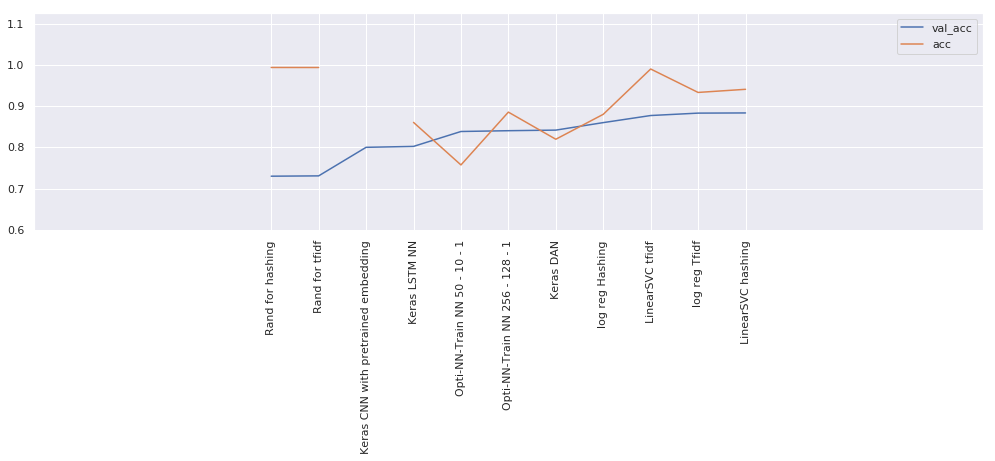

In [8]:
# reports=pd.concat([pd.DataFrame().from_csv("reports/Keras DAN.csv"),
#                   pd.DataFrame().from_csv("reports/Keras LSTM NN.csv")])
reports=pd.DataFrame()
report_names = os.listdir(path="reports")

for name in report_names:
    if ".csv" in name and "K-fold" not in name and "K-Fold" not in name:
        print(name)
        report=pd.DataFrame().from_csv("reports/" + name)
        report["title_short"]=name[:10]
        reports=pd.concat([reports,report])
# print(reports)
reports.sort_values(by="val_acc",inplace=True)
plt.rcParams["figure.figsize"] = [17,4]
plt.plot(reports.title,reports.val_acc)
plt.plot(reports.title,reports.acc)
plt.xticks(rotation='vertical')
plt.margins(0.5)
plt.legend()
reports

## Compare optimisation on dropout

Opti-NN-Optimise with K-folds - Low dropout on 1 layer.csv
Opti-NN-Optimise with K-folds - No dropouts.csv
Opti-NN-Optimise with K-folds - High dropout on 2 layers.csv
Opti-NN-Optimise with K-folds - High dropout on 1 layer.csv
Opti-NN-Optimise with K-folds - Low dropout on 2 layers.csv


,acc,loss,val_acc,val_loss,title,sample_size,batch_size,train_test_ratio,training_set_size,validation_set_size,vocab_size,nb_epochs,training_duration_in_secs,title_short
0,0.96608,0.100862,0.99936,0.009122,Opti-NN-Optimise with K-folds - High dropout o...,9375,64,0.333333,6250,3125,1000,5,59.345510,Opti-NN-Op
0,0.98368,0.051272,0.99936,0.005888,Opti-NN-Optimise with K-folds - Low dropout on...,9375,64,0.333333,6250,3125,1000,5,54.903074,Opti-NN-Op
0,0.98624,0.045254,0.99968,0.009790,Opti-NN-Optimise with K-folds - High dropout o...,9375,64,0.333333,6250,3125,1000,5,66.466385,Opti-NN-Op
0,0.99696,0.012528,0.99968,0.004451,Opti-NN-Optimise with K-folds - Low dropout on...,9375,64,0.333333,6250,3125,1000,5,62.224276,Opti-NN-Op
0,0.99872,0.005465,0.99936,0.004106,Opti-NN-Optimise with K-folds - No dropouts,9375,64,0.333333,6250,3125,1000,5,50.142298,Opti-NN-Op


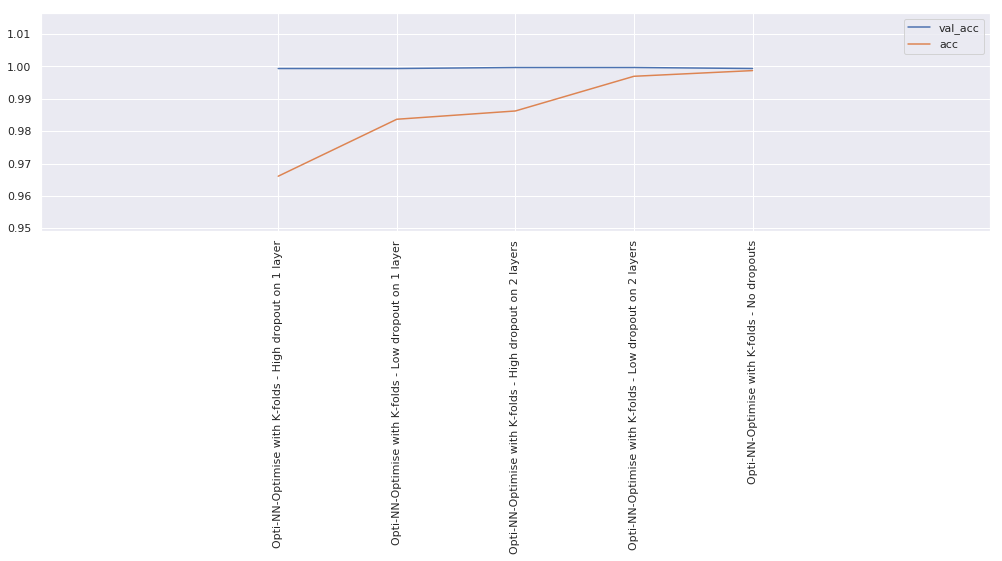

In [11]:
# reports=pd.concat([pd.DataFrame().from_csv("reports/Keras DAN.csv"),
#                   pd.DataFrame().from_csv("reports/Keras LSTM NN.csv")])
reports=pd.DataFrame()
report_names = os.listdir(path="reports")

for name in report_names:
    if ".csv" in name and "Keras" not in name and "Train NN" not in name\
        and "Log" not in name and 'Opti' in name:
        print(name)
        report=pd.DataFrame().from_csv("reports/" + name)
        report["title_short"]=name[:10]
        reports=pd.concat([reports,report])
# print(reports)
reports.sort_values(by="val_acc",inplace=True)
reports.sort_values(by="acc",inplace=True)
plt.rcParams["figure.figsize"] = [17,4]
plt.plot(reports.title,reports.val_acc)
plt.plot(reports.title,reports.acc)
plt.xticks(rotation='vertical')
plt.margins(0.5)
plt.legend()
reports

27/2 Comments:

Logistic regression looks very suspicious, to check again

LSTM must be run on the whole sample

CNN was not run on many epochs compared to others, and sample size is suspicious

need to include the batch size in all NN notebooks and use the same ideally: 64

why is the dan network not way better than the simple dense layers (which have no embedding and have a simpler architecture)
